In [3]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from reckit import Configurator
from importlib.util import find_spec
from importlib import import_module
from reckit import typeassert
import os
import numpy as np
import random

import pprint
pp = pprint.PrettyPrinter(indent=4)

@typeassert(recommender=str, platform=str)
def find_recommender(recommender, platform="pytorch"):
    model_dirs = set(os.listdir("model"))
    model_dirs.remove("base")

    module = None
    if platform == "pytorch":
        platforms = ["pytorch", "tensorflow"]
    elif platform == "tensorflow":
        platforms = ["tensorflow", "pytorch"]
    else:
        raise ValueError(f"unrecognized platform: '{platform}'.")

    for platform in platforms:
        if module is not None:
            break
        for tdir in model_dirs:
            spec_path = ".".join(["model", tdir, platform, recommender])
            if find_spec(spec_path):
                module = import_module(spec_path)
                break

    if module is None:
        raise ImportError(f"Recommender: {recommender} not found")

    if hasattr(module, recommender):
        Recommender = getattr(module, recommender)
    else:
        raise ImportError(f"Import {recommender} failed from {module.__file__}!")
    return Recommender

config = Configurator()
config.add_config("NeuRec.ini", section="NeuRec")

os.environ['CUDA_VISIBLE_DEVICES'] = str(config["gpu_id"])

seed=2020
seed=config["seed"]

np.random.seed(seed)
random.seed(seed)
tf.set_random_seed(seed)
print("set tensorflow seed")

Recommender = find_recommender(config.recommender, platform=config.platform)

model_cfg = os.path.join("conf", config.recommender + ".ini")
config.add_config(model_cfg, section="hyperparameters", used_as_summary=True)

config.sections["MF:[hyperparameters]"]['epochs'] = '20'

recommender = Recommender(config)
results = recommender.train_model()

set tensorflow seed
2020-10-26 07:33:03.888: my pid: 12360
2020-10-26 07:33:03.889: model: model.general_recommender.tensorflow.MF
2020-10-26 07:33:03.890: Dataset statistics:
Name: ml-100k_ratio_u5_i5
The number of users: 943
The number of items: 1349
The number of ratings: 99287
Average actions of users: 105.29
Average actions of items: 73.60
The sparsity of the dataset: 92.195075%

The number of training: 69918
The number of validation: 0
The number of testing: 29369
2020-10-26 07:33:03.892: NeuRec:[NeuRec]:
recommender=MF
platform=tensorflow
data_dir='dataset\ml-100k_ratio_u5_i5'
file_column=UIRT
sep='\t'
gpu_id=0
gpu_mem=0.99
metric=["Precision", "Recall", "MAP", "NDCG", "MRR"]
top_k=[10,20]
test_thread=4
test_batch_size=64
seed=2020

MF:[hyperparameters]:
lr=0.001
reg=0.001
embedding_size=64
batch_size=1024
epochs=20
is_pairwise=True
loss_func=bpr
param_init=normal


C:\Projects\NeuRec\data\dataset.py:264: UserWarning: dataset\ml-100k_ratio_u5_i5\ml-100k_ratio_u5_i5.valid does not exist.
  warnings.warn("%s does not exist." % valid_file)


2020-10-26 07:33:04.850: metrics:	Precision@10	Precision@20	Recall@10   	Recall@20   	MAP@10      	MAP@20      	NDCG@10     	NDCG@20     	MRR@10      	MRR@20      
2020-10-26 07:33:05.576: epoch 0:	0.25853670  	0.21802793  	0.10290904  	0.15988351  	0.17514013  	0.14244832  	0.29211214  	0.27658394  	0.53179073  	0.53642905  
2020-10-26 07:33:06.067: epoch 1:	0.30265141  	0.24358457  	0.12109274  	0.18118626  	0.22593637  	0.17875914  	0.34865770  	0.32090282  	0.61251801  	0.61699003  
2020-10-26 07:33:06.530: epoch 2:	0.31845203  	0.25535557  	0.13426985  	0.19951732  	0.23572171  	0.18933782  	0.36392426  	0.33799455  	0.62781936  	0.63151181  
2020-10-26 07:33:06.903: epoch 3:	0.33170766  	0.26898202  	0.14273241  	0.21672279  	0.24340776  	0.19951999  	0.37267455  	0.35136989  	0.61936355  	0.62358785  
2020-10-26 07:33:07.402: epoch 4:	0.34443277  	0.28202552  	0.15350962  	0.23611321  	0.25429362  	0.21176012  	0.38578710  	0.36826095  	0.62805337  	0.63215244  
2020-10-26 07:33

In [4]:
myresult={x +'@'+ str(y): [] * config.epochs for x in config.metric for y in config.top_k}
print(myresult)


{'Precision@10': [], 'Precision@20': [], 'Recall@10': [], 'Recall@20': [], 'MAP@10': [], 'MAP@20': [], 'NDCG@10': [], 'NDCG@20': [], 'MRR@10': [], 'MRR@20': []}


In [5]:
metrics=list(x +'@'+ str(y) for x in config.metric for y in config.top_k)
print(metrics)

['Precision@10', 'Precision@20', 'Recall@10', 'Recall@20', 'MAP@10', 'MAP@20', 'NDCG@10', 'NDCG@20', 'MRR@10', 'MRR@20']


In [6]:

for epoch,r in enumerate(results):
    for metric_arr in r:
        for itenN,value in enumerate(metric_arr):
            #print("{} {} {}".format(epoch, itenN, value))
            myresult[metrics[itenN]].append(value)
            
pp.pprint(myresult)


{   'MAP@10': [   0.17514013,
                  0.22593637,
                  0.2357217,
                  0.24340776,
                  0.25429362,
                  0.25520486,
                  0.26282722,
                  0.26448536,
                  0.26239383,
                  0.2658575,
                  0.26618096,
                  0.26735535,
                  0.2677833,
                  0.27084744,
                  0.27413252,
                  0.2768642,
                  0.28273994,
                  0.28271547,
                  0.28373334,
                  0.28445858],
    'MAP@20': [   0.14244832,
                  0.17875914,
                  0.18933782,
                  0.19951999,
                  0.21176012,
                  0.21692553,
                  0.22203395,
                  0.22654697,
                  0.22792788,
                  0.23089036,
                  0.23201437,
                  0.23285155,
                  0.23405059,
             

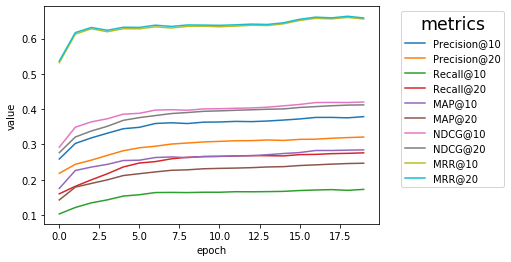

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

for m in metrics:
    plt.plot(list(range(config.epochs)), myresult[m], label=m)

    
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='metrics', title_fontsize='xx-large')
#plt.legend()
plt.show()